<a href="https://colab.research.google.com/github/AndresPautrat/Topicos_UPC/blob/main/Politicas_movimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
class MDP:    
    "0: up, 1: right, 2: left, 3: down"
    _transitions = np.array([
        [[4, 0.8], [-1, 0.1], [1, 0.1]],
        [[1, 0.8], [-4, 0.1], [4, 0.1]],
        [[-1, 0.8], [-4, 0.1], [4, 0.1]],
        [[-4, 0.8], [-1, 0.1], [1, 0.1]]
        ])
    
    def __init__(self, gamma=0.9):
        self.reward = np.zeros(3*4)
        self.reward[-1] = +1
        self.reward[5] = -1
        self.reward[7] = -1
        self.gamma = gamma
        
    def rewards(self, state):
        """
        To be completed
        """
        return(self.reward[state])
    
    def _bounces(self, state, s):
        """
        To be completed
        """
        return np.sum(
            np.abs(np.array(np.where(np.arange(12).reshape(3,4))==state)-
                   np.array(np.where(np.arange(12).reshape(3,4))==s)
            )
        )
    
    def transition(self, state, action):
        """
        To be completed
        """
        if(state==7 or state==11):
          return np.zeros()
        trans=-MDP.transitons[action].copy()
        trans=trans.T
        trans[0,:]+=state
        trans=trans.T
        for i,(s,uti) in enumerate(trans):
          if(s<0 or s>12 or s==5 or self._bounces()):
            trans[i,0]=state
        return trans

In [ ]:
def print_utilities(utilities):
    plt.figure()
    reshaped = utilities.reshape((3,4))
    reshaped[1,1] = -1
    ax = sns.heatmap(reshaped, annot=True)
    ax.invert_yaxis()

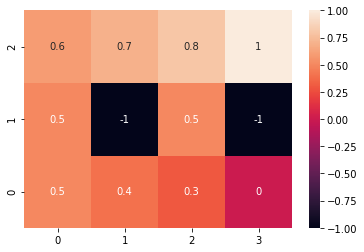

In [ ]:
mdp = MDP()

utilities = np.array([0.5,0.4,0.3,0.,0.5,-1.,0.5,-1.,0.6,0.7,0.8,1])
print_utilities(utilities)

In [ ]:
def q(mdp, state, action, utilities):
  trans = mdp.transition(state, action)
  return np.sum(utilities[trans.T[0].astype(int)] * trans.T[1])

def value_iteration(mdp, utilities):
  utilities_new = np.zeros(len(utilities))
  n = 0
  delta = np.inf
  while delta > 1e-10: #pow(1,-10)
    for state in range(len(utilities)):
      utilities_new[state] = mdp.rewards(state) + mdp.gamma * np.max([q(mdp,state, a, utilities) for a in range(4)]) #Bellman equation
    delta = np.max(np.abs(utilities - utilities_new))
    utilities = utilities_new.copy()
    n += 1
  print(n)
  return utilities

In [ ]:
def extract_policy(position, qtable):
  qtable = qtable.reshape((3,4))
  policy = []
  path = [position]
  while not(position[0] == 2 and position[1] == 3):
    neigborhood = []
    if position[0] > 0:
      neigborhood += [("down",qtable[position[0] - 1, position[1]])]
    if position[0] < 2:
      neigborhood += [("up",qtable[position[0] + 1, position[1]])]
    if position[1] > 0:
      neigborhood += [("left",qtable[position[0], position[1] - 1])]
    if position[1] < 3:
      neigborhood += [("right",qtable[position[0], position[1] + 1])]
    #print(neigborhood,end="\t->\t")
    action = [n[0] for n in neigborhood if n[1] == max([n1[1] for n1 in neigborhood])][0]
    #print(action,end="\t->\t")
    if action == "down":
      position = (position[0] - 1, position[1])
    if action == "up":
      position = (position[0] + 1, position[1])
    if action == "left":
      position = (position[0], position[1] - 1)
    if action == "right":
      position = (position[0], position[1] + 1)
    #print(position)
    policy += [action]
    path += [position]
  return policy,path

In [ ]:
po,pa = extract_policy((0,0), optimal)
print(po)
print(pa)

opt = np.zeros(12).reshape((3,4))

for x in pa:
  opt[x[0],x[1]] = 1

print_utilities(opt)

NameError: ignored